<a href="https://colab.research.google.com/github/akshaysinha266/ml_assignment/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archive:  /content/train-20230426T185151Z-001.zip
replace train/5/90.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train/5/90.bmp          
  inflating: train/5/27.bmp          
  inflating: train/5/87.bmp          
  inflating: train/5/46.bmp          
  inflating: train/5/16.bmp          
  inflating: train/5/6.bmp           
  inflating: train/5/64.bmp          
  inflating: train/5/78.bmp          
  inflating: train/5/74.bmp          
  inflating: train/5/24.bmp          
  inflating: train/5/88.bmp          
  inflating: train/5/13.bmp          
  inflating: train/5/55.bmp          
  inflating: train/5/94.bmp          
  inflating: train/5/30.bmp          
  inflating: train/5/71.bmp          
  inflating: train/5/85.bmp          
  inflating: train/5/26.bmp          
  inflating: train/5/72.bmp          
  inflating: train/5/17.bmp          
  inflating: train/5/36.bmp          
  inflating: train/5/93.bmp          
  inflating: train/5/68.bmp          
  inflating:

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 3s 57ms/step - loss: 1.8268 - accuracy: 0.4420 - val_loss: 1.8289 - val_accuracy: 0.5393
Epoch 2/30
32/32 [==============================] - 1s 39ms/step - loss: 1.1409 - accuracy: 0.6330 - val_loss: 1.7846 - val_accuracy: 0.5112
Epoch 3/30
32/32 [==============================] - 1s 36ms/step - loss: 0.8566 - accuracy: 0.7180 - val_loss: 1.4412 - val_accuracy: 0.6124
Epoch 4/30
32/32 [==============================] - 1s 32ms/step - loss: 0.7539 - accuracy: 0.7550 - val_loss: 1.9855 - val_accuracy: 0.6011
Epoch 5/30
32/32 [==============================] - 1s 30ms/step - loss: 0.7010 - accuracy: 0.7720 - val_loss: 1.7773 - val_accuracy: 0.5955
Epoch 6/30
32/32 [==============================] - 1s 30ms/step - loss: 0.6644 - accuracy: 0.7970 - val_loss: 1.2275 - val_accuracy: 0.7135
Epoch 7/30
32/32 [==============================] - 1s 31ms/step - loss: 0.6296 - accuracy: 0.7820 - val_loss: 1.1252 - val_accuracy: 0.6966
Epoch 8/30
32/32 [======

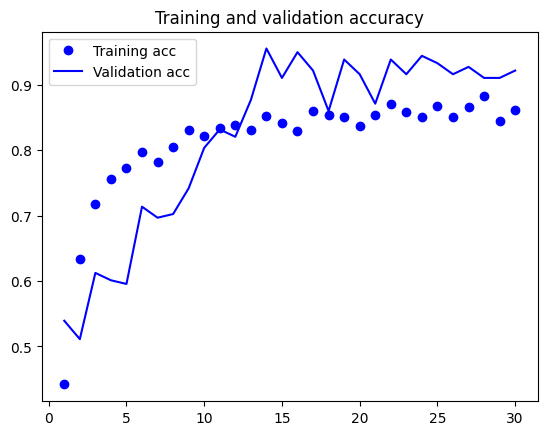

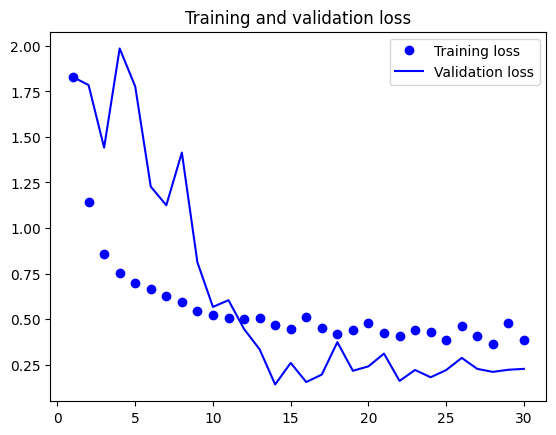

In [2]:
# Unzip the training and validation datasets
!unzip /content/train-20230426T185151Z-001.zip
!unzip /content/val-20230426T184927Z-001.zip

# Import necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Define the data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    'val',
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical')

# Define the neural network architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model with the optimizer and loss function
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history of training
history = model.fit(train_generator, epochs=30, validation_data=val_generator)

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
